In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Review

- Pivots and joins multiple choice
- Conducted at https://pollev.com/jeremysanchez


In [2]:
farmers_markets = Table.read_table('farmers_markets.csv')
farmers_markets.group(['Bakedgoods','Vegetables','Seafood']).sort('count',descending=True)

Bakedgoods | Vegetables | Seafood | count
Y          | Y          | N       | 3379
N          | N          | N       | 3202
Y          | Y          | Y       | 1248
N          | Y          | N       | 564
Y          | N          | N       | 80
N          | Y          | Y       | 41
Y          | N          | Y       | 30
N          | N          | Y       | 2

In [3]:
skyscrapers = Table.read_table('skyscrapers.csv')

### Question 

- I would like to make a visualization of the distribution of material types of buildings among each of San Francisco, New York and Chicago.
- Which cross-classification method is best for this? 

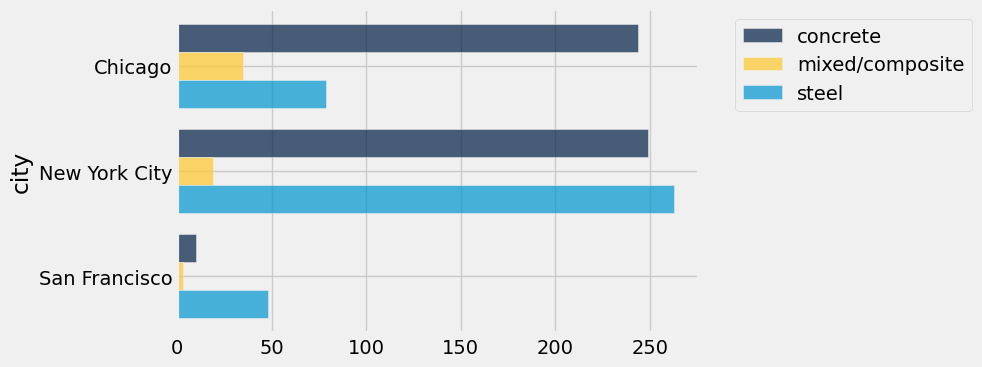

In [4]:
cities_we_want = make_array('San Francisco', 'New York City', 'Chicago')


skyscrapers.where('city', are.contained_in(cities_we_want)).pivot('material','city').barh('city')
plots.show()

## New material

### Comparison Expressions result in a `bool`

In [5]:
x = 3 
y = 2

In [6]:
x == y

False

In [7]:
x == y + 1

True

In [8]:
x != y

True

In [9]:
2 < x < 5

True

In [10]:
y >= x - 1

True

In [11]:
y > x - 1

False

#### `=` and `==` are different!!!

In [12]:
x = y

In [13]:
x

2

In [14]:
y

2

In [15]:
x = 3 
y = 2
x == y

False

### `True` counts as `1`, `False` counts as `0`

In [16]:
z = make_array('Jeremy', 'DeNero', 'Jeremy')

In [17]:
z == "Jeremy"

array([ True, False,  True], dtype=bool)

In [18]:
sum(z == "Jeremy")

2

In [19]:
np.average(z == "Jeremy")

0.66666666666666663

In [20]:
np.arange(3) > 1

array([False, False,  True], dtype=bool)

In [21]:
sum(make_array(0,1,2) >= 1)

2

In [22]:
sum(make_array(0,1,2,3) <=1) == 2

True

### Control your computations with an `if` statement

In [23]:
def sign(x):
    """determines the sign (+/-) of a numeric input"""
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'

In [24]:
sign(1)

'Positive'

In [25]:
sign(-1)

'Negative'

In [26]:
sign(0)

'Neither positive nor negative'

In [27]:
sign('-1')

TypeError: '>' not supported between instances of 'str' and 'int'

#### Discussion Question*: 
- What is the sign of the following expression?

```python
sign(sum(np.arange(4) <= 1) * -2)
```

In [28]:
sign(sum(np.arange(4) <= 1) * -2)

'Negative'

### Control your computations with a `for` loop

In [29]:
for i in np.arange(5):
    print("I am counting to 100. I am at " + str(i + 1))

I am counting to 100. I am at 1
I am counting to 100. I am at 2
I am counting to 100. I am at 3
I am counting to 100. I am at 4
I am counting to 100. I am at 5


In [30]:
faculty = make_array('Jeremy', 'DeNero', 'Adhikari')

for i in faculty:
    print(i)

Jeremy
DeNero
Adhikari


In [53]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [60]:
outcomes = np.array([])

for i in np.arange(20000):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    

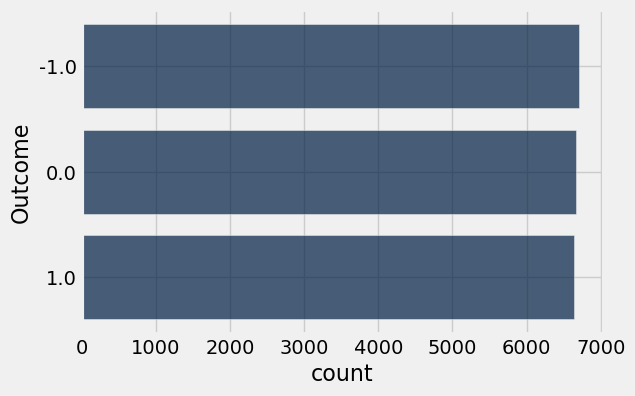

In [61]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)
plots.show()